In [16]:
import pandas as pd

# DEPLOYMENT & PREPROCESSING

We have 36 csv files for the test cases data collected, 6 each for 6 activities i.e. Sitting, Standing, Laying, Walking, Walking Upstairs, Walking downstairs.

We utilize the app `Physics Toolbox Sensor Suite Pro` on smartphone to collect the data. We collected 6 samples per activity class. The .csv files can be accessed from the sub-folder 'Data_New' within the folder 'Mini-Project'.

The video of data collection has also been uploaded and can be accessed from inside the same folder as the .csv files.

In [17]:
# Specify the base directory where your CSV files are located
base_directory = "Data_New/"

# Specify the activities and their corresponding file counts
activities = ["walk", "Climb_Up", "Walking_Downstairs", "Sitting", "Standing", "Laying"]
file_counts = [6, 6, 6, 6, 6, 6]

# Initialize an empty list to store file paths
file_paths = []

# Generate file paths dynamically based on the pattern
for activity, count in zip(activities, file_counts):
    for i in range(1, count + 1):
        file_name = f"{activity}_{i}.csv"
        file_path = f"{base_directory}{file_name}"
        file_paths.append(file_path)

In [18]:
df = pd.read_csv(file_paths[0])
print(df)
y_test = pd.Series([1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4,5,5,5,5,5,5,6,6,6,6,6,6])
df.to_csv('combined.csv', index=False)
file_paths

          time     gFx     gFy     gFz   TgF
0     0.014588  0.9702  0.0507  0.0775  0.97
1     0.031583  0.9641  0.0524  0.0738  0.97
2     0.048791  0.9692  0.0519  0.0699  0.97
3     0.069477  0.9800  0.0643  0.0743  0.98
4     0.097059  1.0042  0.0705  0.0951  1.01
..         ...     ...     ...     ...   ...
726  14.721599  1.0081 -0.1395  0.1293  1.03
727  14.738223  0.9966 -0.1124  0.1554  1.01
728  14.756324  0.9868 -0.0478  0.1706  1.00
729  14.790683  1.1635  0.1765  0.1877  1.19
730  14.812762  1.2344 -0.1156 -0.1826  1.25

[731 rows x 5 columns]


['Data_New/walk_1.csv',
 'Data_New/walk_2.csv',
 'Data_New/walk_3.csv',
 'Data_New/walk_4.csv',
 'Data_New/walk_5.csv',
 'Data_New/walk_6.csv',
 'Data_New/Climb_Up_1.csv',
 'Data_New/Climb_Up_2.csv',
 'Data_New/Climb_Up_3.csv',
 'Data_New/Climb_Up_4.csv',
 'Data_New/Climb_Up_5.csv',
 'Data_New/Climb_Up_6.csv',
 'Data_New/Walking_Downstairs_1.csv',
 'Data_New/Walking_Downstairs_2.csv',
 'Data_New/Walking_Downstairs_3.csv',
 'Data_New/Walking_Downstairs_4.csv',
 'Data_New/Walking_Downstairs_5.csv',
 'Data_New/Walking_Downstairs_6.csv',
 'Data_New/Sitting_1.csv',
 'Data_New/Sitting_2.csv',
 'Data_New/Sitting_3.csv',
 'Data_New/Sitting_4.csv',
 'Data_New/Sitting_5.csv',
 'Data_New/Sitting_6.csv',
 'Data_New/Standing_1.csv',
 'Data_New/Standing_2.csv',
 'Data_New/Standing_3.csv',
 'Data_New/Standing_4.csv',
 'Data_New/Standing_5.csv',
 'Data_New/Standing_6.csv',
 'Data_New/Laying_1.csv',
 'Data_New/Laying_2.csv',
 'Data_New/Laying_3.csv',
 'Data_New/Laying_4.csv',
 'Data_New/Laying_5.csv',


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Initialize an empty array to store the combined data
combined_test_data = np.zeros((0, 500, 3))

# Loop through each file and append the data to the combined array
for file_path in file_paths:
    df = pd.read_csv(file_path)

    # Calculate the starting index to get the middle 500 rows
    start_index = df.shape[0] // 2 - 250
    end_index = start_index + 500

    # Select the middle 500 rows and the first 3 columns
    selected_data = df.iloc[start_index:end_index, 1:4].values

    # Reshape selected_data to be 3D: (1, 500, 3)
    selected_data = selected_data[np.newaxis, :, :]

    # Append the selected data to the combined array
    combined_test_data = np.vstack((combined_test_data, selected_data))

y_test = pd.Series([1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4,5,5,5,5,5,5,6,6,6,6,6,6])
combined_test_data

array([[[ 0.9817, -0.0295,  0.0916],
        [ 0.9785, -0.0295,  0.0953],
        [ 0.9817, -0.0307,  0.0909],
        ...,
        [ 1.0638, -0.3035, -0.2129],
        [ 0.9365, -0.0698, -0.2459],
        [ 0.8497,  0.4078, -0.1941]],

       [[ 0.9294,  0.0749,  0.1963],
        [ 0.9321,  0.1171,  0.2229],
        [ 0.948 ,  0.0841,  0.1767],
        ...,
        [ 0.8284, -0.1258,  0.0699],
        [ 0.8768, -0.2043,  0.0845],
        [ 0.9054, -0.219 ,  0.1117]],

       [[ 0.9814,  0.0145,  0.0225],
        [ 0.9858, -0.0082,  0.0242],
        [ 0.9873, -0.0483,  0.011 ],
        ...,
        [ 1.0941, -0.039 ,  0.1586],
        [ 1.4454,  0.0819,  0.1058],
        [ 1.4864, -0.2236, -0.198 ]],

       ...,

       [[ 0.0074,  0.046 ,  1.0031],
        [ 0.0093,  0.0455,  1.0041],
        [ 0.0113,  0.0441,  1.0022],
        ...,
        [ 0.012 ,  0.0428,  1.0022],
        [ 0.0132,  0.0416,  0.999 ],
        [ 0.0113,  0.0423,  1.    ]],

       [[ 0.0145,  0.0431,  1.0004],
  

In [20]:
# Flatten the combined_test_data for adding to the dataset
flattened_data = combined_test_data.reshape(combined_test_data.shape[0], -1)

# Convert to DataFrame
df_combined = pd.DataFrame(flattened_data)

# Add the labels (y_test) as a column to the DataFrame
df_combined['label'] = y_test.values

# Save the combined DataFrame to a CSV file
df_combined.to_csv('combined_dataset_with_labels.csv', index=False)

# Display a snippet of the resulting DataFrame
print(df_combined.shape)
print(df_combined.head())

(36, 1501)
        0       1       2       3       4       5       6       7       8  \
0  0.9817 -0.0295  0.0916  0.9785 -0.0295  0.0953  0.9817 -0.0307  0.0909   
1  0.9294  0.0749  0.1963  0.9321  0.1171  0.2229  0.9480  0.0841  0.1767   
2  0.9814  0.0145  0.0225  0.9858 -0.0082  0.0242  0.9873 -0.0483  0.0110   
3  0.9140 -0.0134  0.0369  0.9807 -0.0082  0.0562  1.0235 -0.0283  0.0640   
4  0.9370 -0.1407 -0.0113  0.9387 -0.0904  0.0176  0.9040 -0.0557  0.0347   

        9  ...    1491    1492    1493    1494    1495    1496    1497  \
0  0.9893  ...  1.0638 -0.3035 -0.2129  0.9365 -0.0698 -0.2459  0.8497   
1  0.9580  ...  0.8284 -0.1258  0.0699  0.8768 -0.2043  0.0845  0.9054   
2  0.9900  ...  1.0941 -0.0390  0.1586  1.4454  0.0819  0.1058  1.4864   
3  1.0144  ...  0.9663  0.0040  0.1256  0.9489  0.0812  0.1471  0.9636   
4  0.9008  ...  1.1692 -0.2014  0.0354  1.2181 -0.4123  0.0178  1.0949   

     1498    1499  label  
0  0.4078 -0.1941      1  
1 -0.2190  0.1117      1  


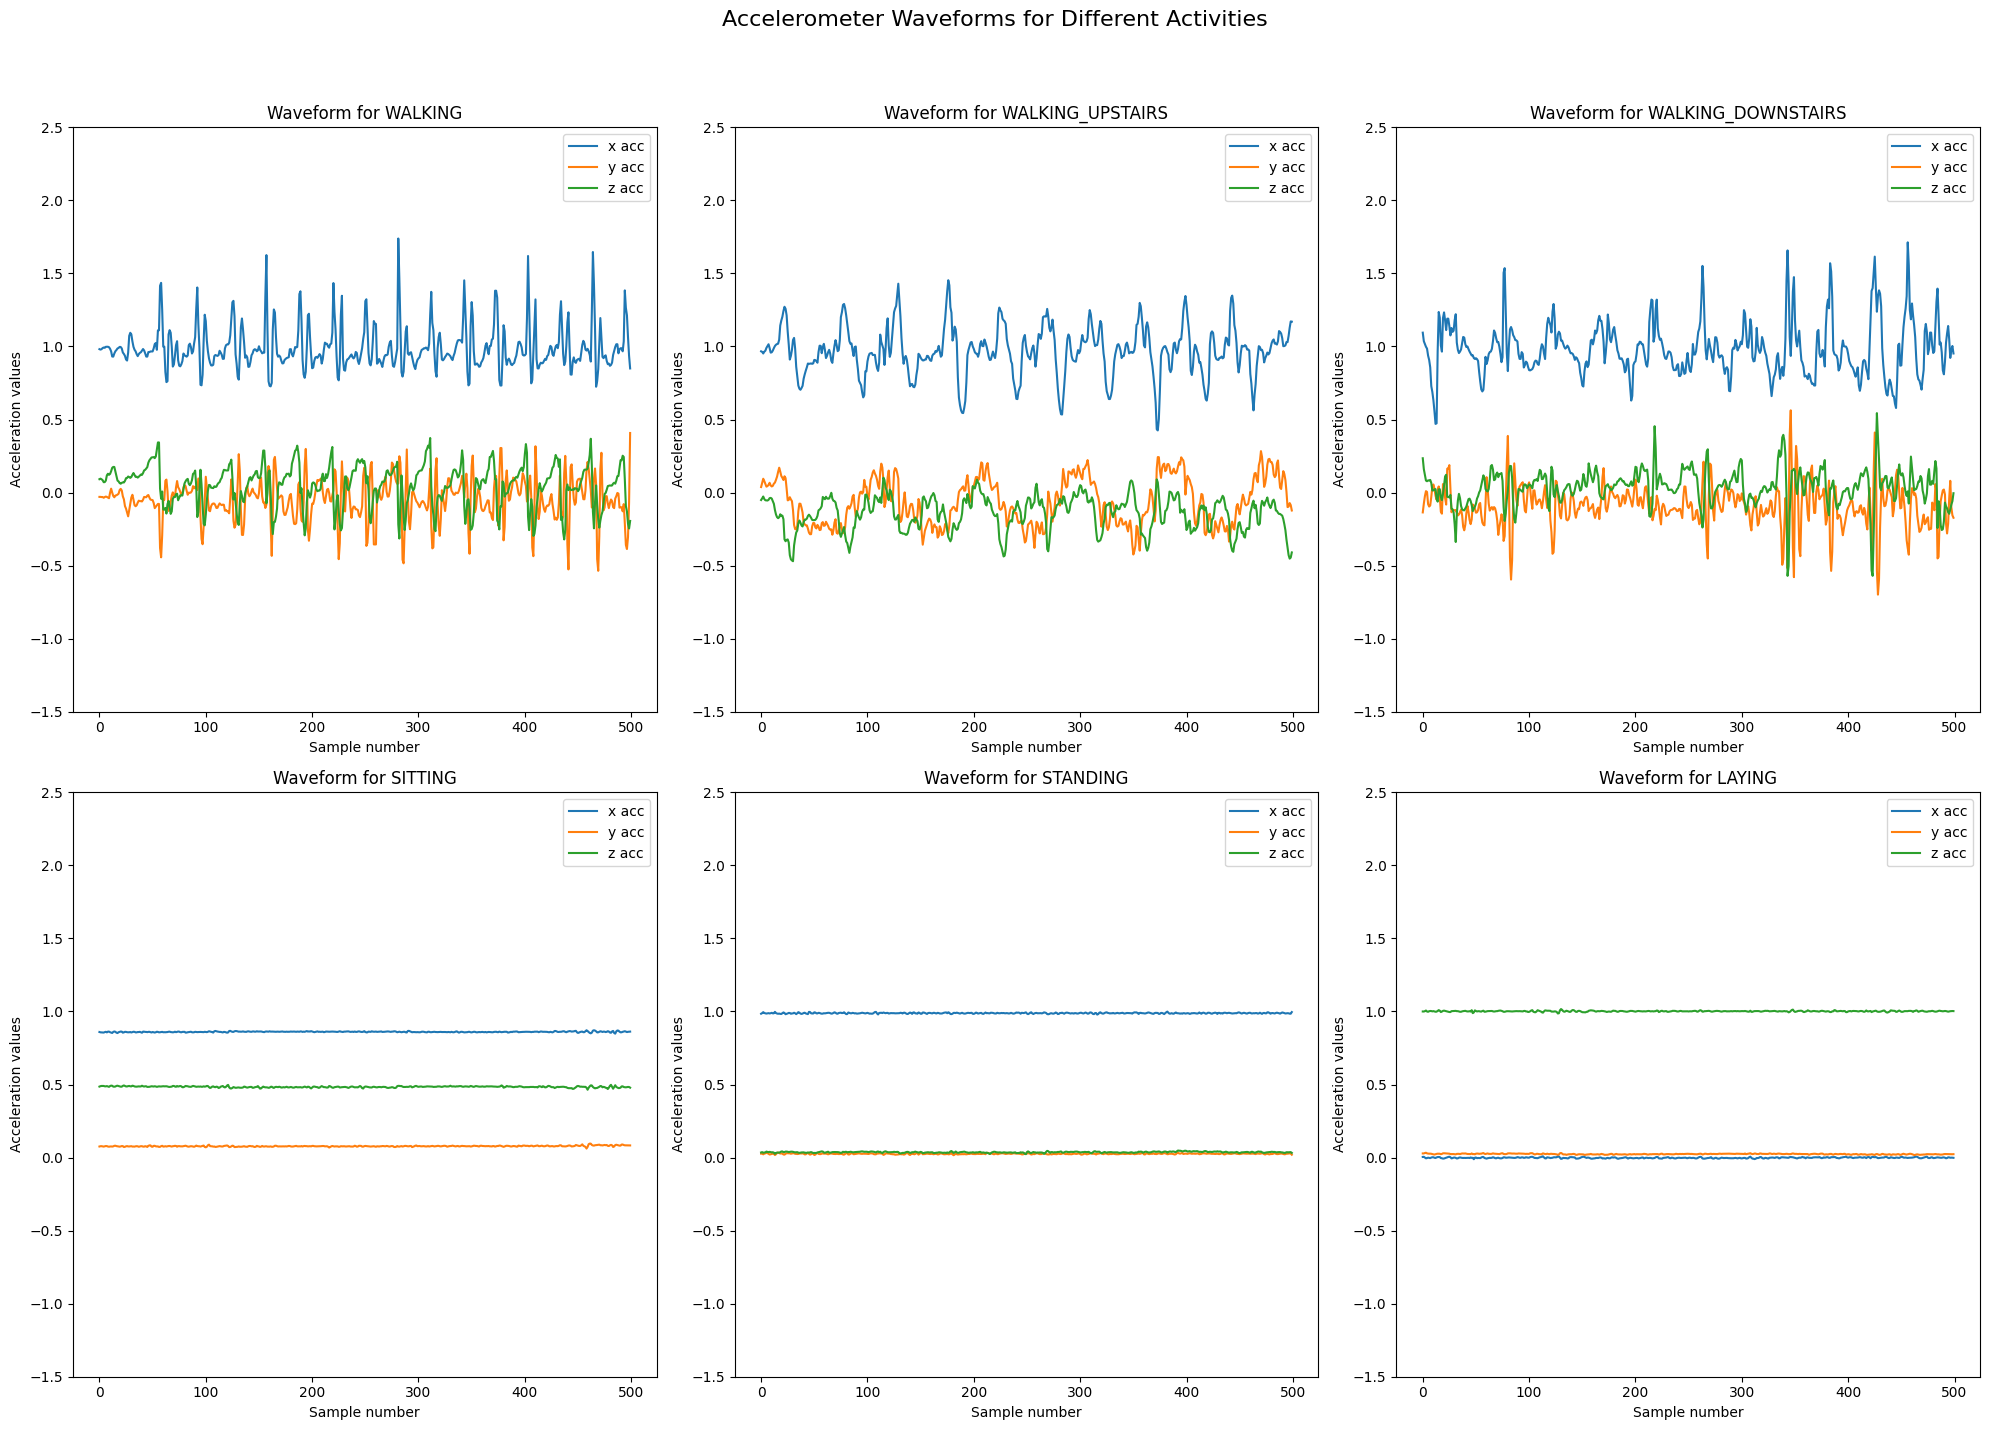

In [21]:
fig, axes = plt.subplots(2, 3, figsize=(20, 15))
fig.suptitle("Accelerometer Waveforms for Different Activities", fontsize=16)
classes = {"WALKING": 1, "WALKING_UPSTAIRS": 2,
           "WALKING_DOWNSTAIRS": 3, "SITTING": 4, "STANDING": 5, "LAYING": 6}
axes = axes.flatten()

for i, activity in enumerate(classes):
    data = combined_test_data[y_test == classes[activity]][0]
    axes[i].plot(data, label=["x acc", "y acc", "z acc"])
    axes[i].set_title(f"Waveform for {activity}")
    axes[i].set_xlabel("Sample number")
    axes[i].set_ylabel("Acceleration values")
    axes[i].set_ylim([-1.5, 2.5])
    axes[i].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Raw Data

In [22]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# Load the features
features = pd.read_csv(r'D:/College/Semester 5/ES335 Ml/ES335_Andrew_NG/HAR/UCI HAR Dataset/features.txt', delim_whitespace=True, header=None)

feature_names = features[1].values  # Extract the feature names

# Load the training data
X_train = pd.read_csv(r'D:\College\Semester 5\ES335 Ml\ES335_Andrew_NG\HAR\UCI HAR Dataset\train\X_train.txt', delim_whitespace=True, header=None)
X_train.columns = feature_names  # Assign feature names to columns

# Load the labels
y_train = pd.read_csv(r'D:\College\Semester 5\ES335 Ml\ES335_Andrew_NG\HAR\UCI HAR Dataset\train\y_train.txt', delim_whitespace=True, header=None)
y_train.columns = ['Activity']  # Give a meaningful name to the column

# print(X_train)

print(X_train.columns)


Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyBodyGyroJerkMag-skewness()',
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)'],
      dtype='object', length=561)


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)


In [24]:
# Apply PCA
dataset_pca = PCA(n_components=2)
dataset_pca_results = dataset_pca.fit_transform(X_train_scaled)


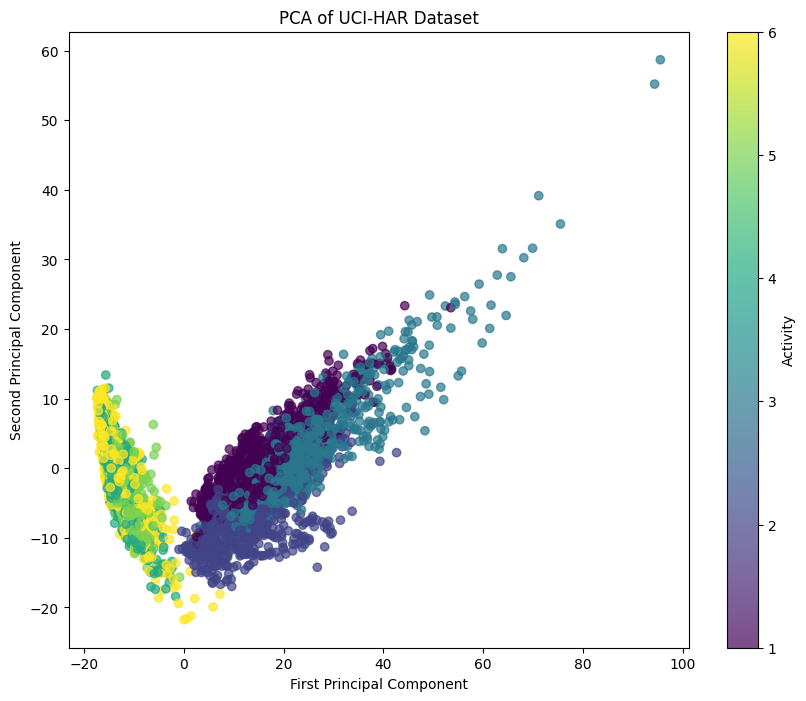

In [25]:
import matplotlib.pyplot as plt

# Plotting the PCA results
plt.figure(figsize=(10, 8))
plt.scatter(dataset_pca_results[:, 0], dataset_pca_results[:, 1], c=y_train['Activity'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Activity')
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("PCA of UCI-HAR Dataset")
plt.show()


In [42]:
# Select few-shot samples from the training data
few_shot_samples = []
few_shot_labels = []

# Select 5 samples per class (activity)
for activity in np.unique(y_train):
    indices = np.where(y_train['Activity'] == activity)[0][:5]  # 5 samples per class
    few_shot_samples.append(dataset_pca_results[indices])
    few_shot_labels.append(y_train.iloc[indices]['Activity'].values)

# Combine the selected samples and labels
X_few_shot = np.vstack(few_shot_samples)
y_few_shot = np.concatenate(few_shot_labels)


In [ ]:
import pandas as pd 
from langchain_groq.chat_models import ChatGroq

In [41]:
query = f"""
* You are a sentiment analysis model. 
* Your task is to analyze the sentiment expressed in the given text and classify it as 'positive', 'negative', or 'neutral'. 
* Provide the sentiment label and, if necessary, a brief explanation of your reasoning.

Here are few examples:
1. Sentence: 'The customer service was excellent, and I received my order quickly.'
Sentiment: Positive

2. Sentence: 'The food was bland and the service was slow.'
Sentiment: Negative

3. Sentence: 'The product is okay, but it's not worth the price.'
Sentiment: Neutral

Sentence: {sentence}
""" 

# To use Groq LLMs 
model_name = "llama3-70b" # We can choose any model from the groq_models dictionary
llm = ChatGroq(model=groq_models[model_name], api_key=Groq_Token, temperature=0)
answer = llm.invoke(query)

print(answer.content)

KNeighborsClassifier(n_neighbors=3)

In [43]:
X_test= pd.read_csv("output_X.csv")
X_test.columns
y_test=pd.read_csv("output_Y.csv") 
y_test.columns

Index(['y_train'], dtype='object')

In [45]:
# Assuming your collected data is in a DataFrame X_test_raw and y_test contains the labels
# Scale and apply PCA on the collected data
X_test_scaled = scaler.transform(X_test)  # Apply the same scaling as the UCI-HAR data
X_test_pca = dataset_pca.transform(X_test_scaled)  # Apply PCA


ValueError: X has 3 features, but this StandardScaler is expecting 561 features as input.